## TP3 : Logistic regression

The purpose of this tutorial is to implement and use the Logistic Regression for binary classification. We will apply this
method to the problem of handwritten characters to learn how to
distinguish two numbers (here 5 and 6).


In [38]:
from numpy import linalg as la
from pylab import *
from sklearn.metrics import mean_squared_error

import math
import matplotlib.pyplot as plt
import numpy as np

## 1. Logistic regression, IRLS algorithm.

### Preliminary question: the algorithm

#### Have a look at the function `regression_logistique.m` and locate the main steps of the algorithm you have been taught (see course).
You can comment the code in the cell below.

In [39]:
def regression_logistique(X,t,Nitermax=20,eps_conv=1e-3):

    '''Entrees :
        X = [ones(N_train,1) x_train];
        t = class_train 
        Nitermax = nombre maximale d'itérations (20 par défaut)
        eps_conv = critère de convergence sur norm(w-w_old)/norm(w) (1e-3 par défaut)
    
    Sorties : 
        w : vecteur des coefficients de régression logistique
        Niter : nombre d'itérations utilisées effectivement
   
    Fonction de régression logistique pour la classification binaire.
   
    Utilisation :
       Nitermax = 50
       eps_conv = 1e-4
       [w,Niter] = regression_logistique(X,t,Nitermax,eps_conv)
    '''

    N_train = X.shape[0]

    #initialisation : 1 pas de l'algorithme IRLS
    w = np.zeros((X.shape[1],))
    w_old = w 
    y = 1/2*np.ones((N_train,))
    R = np.diag(y*(1-y))   # diag(y_n(1-y_n))
    z = X.dot(w_old)-la.inv(R).dot(y-t)
    w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)

    # boucle appliquant l'algorithme de Newton-Raphson
    Niter = 1
    while ( (la.norm(w-w_old)/la.norm(w)>eps_conv) & (Niter<Nitermax) ):
        Niter = Niter+1
        y = 1/(1+np.exp(-X.dot(w)))
        R = np.diag(y*(1-y))  
        w_old = w 
        z = X.dot(w_old)-la.inv(R).dot(y-t) 
        w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)
         
    return w, Niter

### Reading & preparing synthetic data

Load the training and test data sets `synth_train.txt`
and `synth_test.txt`. The targets t belong to {1,2} and the features  
x belong to R^2. 

We have 100 training samples and 200 test samples

* the 1st column contains the label of each sample, 
* columns 2 and 3 contain the coordinate of each point.

In [40]:
# Training set
synth_train = np.loadtxt('synth_train.txt') 
class_train = synth_train[:,0]
class_train_1 = np.where(synth_train[:,0]==1)[0]
class_train_2 = np.where(synth_train[:,0]==2)[0]
x_train = synth_train[:,1:]
N_train = np.size(x_train,axis=0)

# Test set
synth_test = np.loadtxt('synth_test.txt')
class_test = synth_test[:,0]
class_test_1 = np.where(synth_test[:,0]==1)[0]
class_test_2 = np.where(synth_test[:,0]==2)[0]
x_test = synth_test[:,1:]
N_test = np.size(x_test,axis=0)

### Preparing features for logistic regression (binary classification)
First, we prepare the feature matrix and the target vector associated to 
the training and test sets:


In [41]:
X = np.hstack((np.ones((N_train,1)),x_train))
t = 2-class_train   # 0 if class=2, 1 if class=1

X_test = np.hstack((np.ones((N_test,1)),x_test))
t_test = 2-class_test   # 0 if class=2, 1 if class=1

### Exercise 1 : the logistic function of decision

1. Use the function `regression_logistique.m` to estimate the logistic
regression vector `w`. *Indication : use `Nitermax = 50;
eps_conv=1e-3;`.*
2. Compute the decision function $f(x) = argmax_k P(C_k|x)$ on the test set
to get the classification results. Recall that $y_n=\sigma(w^T x)$ (logistic function)
and that *using vectors* you may directly write $y=\sigma(Xw)$, with the
column of ones in X.
3. Display the results by plotting the points from both the training set
and the test set.
4. Write the equation which defines the decision boundary.
5. Artificially add a few points to the training set far from the decision boundary to check the robustness of logistic regression to outliers. Check the behaviour of LDA for comparison in this case and comment. 


The logistic regression vector is : [-15.206658    -7.91866363   6.56243114]
We obtain the following values: [9.75071360e-01 8.92097753e-03 1.93020684e-02 2.58279471e-04]...


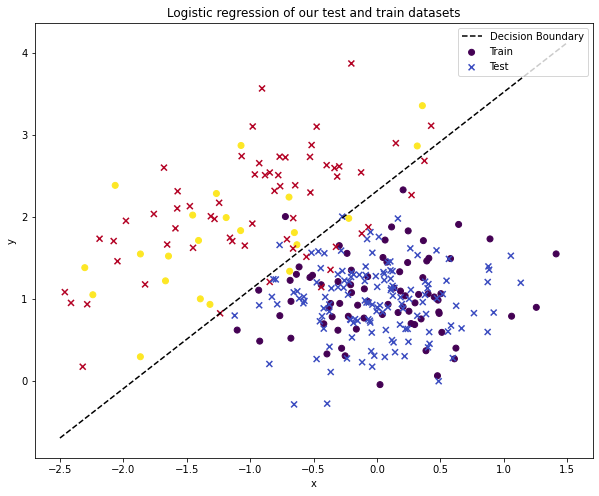

The equation of the decision boundary is: y = (-15.206657998602044 + 7.9186636286641 * x) / 6.56243113984362
The new logistic regression vector is : [-15.20665798  -7.91866362   6.56243113]


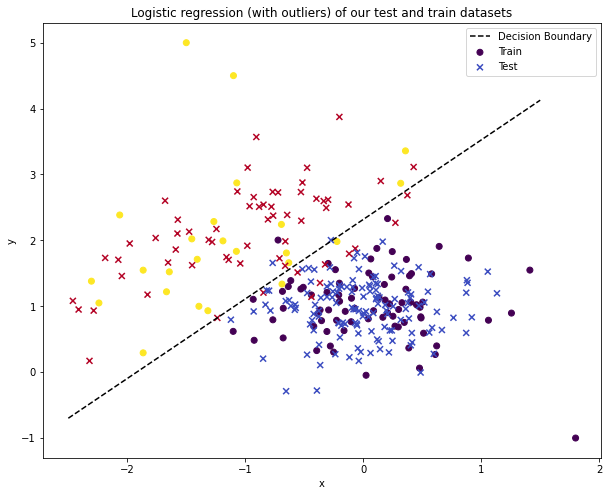

The equation of the decision boundary is: y = (-15.20665798066671 + 7.918663619556048 * x) / 6.562431131918343


In [ ]:
#Exercise 1

# 1. Estimation of the logistic regression vector
w, Niter = regression_logistique(X, t, Nitermax=50, eps_conv=1e-3)
print(f"The logistic regression vector is : {w}")

# 2. Computing the decision function
y = 1 / (1 + np.exp(-np.dot(X, w)))
print(f"We obtain the following values (for our train dataset): {y[:4]}...")

# 3. Display the results
plt.figure(figsize=(10, 8))
plt.scatter(x_train[:,0], x_train[:,1], c=t, cmap='viridis', label='Train')
plt.scatter(x_test[:,0], x_test[:,1], c=t_test, cmap='coolwarm', marker='x', label='Test')

# Display the decision boundary
x1 = np.linspace(-2.5, 1.5, 100)
x2 = (-w[0] - w[1] * x1) / w[2]
plt.plot(x1, x2, 'k--', label='Decision Boundary')

# Display the graph
plt.title("Logistic regression of our test and train datasets")
plt.legend(loc='upper right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# 4. Writing the equation of the decision boundary
if w[1] >= 0:
    print(f"The equation of the decision boundary is: y = ({w[0]} - {w[1]} * x) / {w[2]}")
else :
    print(f"The equation of the decision boundary is: y = ({w[0]} + {abs(w[1])} * x) / {w[2]}")

# 5. Adding outliers
x_train_outliers = np.vstack((x_train, np.array([[-1.5, 5.0], [1.8, -1.0], [-1.1, 4.5]])))
N_train_outliers = N_train + 3
X_outliers = np.hstack((np.ones((N_train_outliers,1)),x_train_outliers))
t_outliers = np.hstack((t, np.array([1, 0, 1])))

# Estimating the new regression vector
w_outliers, Niter_outliers = regression_logistique(X_outliers, t_outliers, Nitermax=50, eps_conv=1e-3)
print(f"The new logistic regression vector is : {w_outliers}")

# Computing the new decision function
y_outliers = 1 / (1 + np.exp(-np.dot(X_outliers, w_outliers)))
x1 = np.linspace(-2.5, 1.5, 100)
x2_outliers = (-w_outliers[0] - w_outliers[1] * x1) / w_outliers[2]

# Displaying the new decision boundary equation
plt.figure(figsize=(10, 8))
plt.scatter(x_train_outliers[:,0], x_train_outliers[:,1], c=t_outliers, cmap='viridis', label='Train')
plt.scatter(x_test[:,0], x_test[:,1], c=t_test, cmap='coolwarm', marker='x', label='Test')
plt.plot(x1, x2_outliers, 'k--', label='Decision Boundary')
plt.title("Logistic regression (with outliers) of our test and train datasets")
plt.legend(loc='upper right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Writing the new decision boundary equation
if w_outliers[1] >= 0:
    print(f"The equation of the decision boundary is: y = ({w_outliers[0]} - {w_outliers[1]} * x) / {w_outliers[2]}")
else :
    print(f"The equation of the decision boundary is: y = ({w_outliers[0]} + {abs(w_outliers[1])} * x) / {w_outliers[2]}")

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
We can indeed see that the equation of the decision boundary is really close to the one we found without the outliers. We can therefore say that the logistic regression is robust and not influenced by the presence of outliers.


To finish, we will compute the error rate of our regression :
</div>

In [57]:
# Bonus. Computing the error rates
predicted_classes_train = (y_outliers >= 0.5).astype(int)
mse_train = mean_squared_error(t_outliers, predicted_classes_train)
print(f"Logistic regression error rate (MSE) - Train: {mse_train:.3f}%")

y_test = 1 / (1 + np.exp(-np.dot(X_test, w)))
predicted_classes_test = (y_test >= 0.5).astype(int)
mse_test = mean_squared_error(t_test, predicted_classes_test)
print(f"Logistic regression error rate (MSE) - Test: {mse_test:.3f}%")

Logistic regression error rate (MSE) - Train: 0.029%
Logistic regression error rate (MSE) - Test: 0.060%


Now we retrieve the LDA function from the TP2, to compare the results :

Parameters of LDA for the train set:

Weights: [0.76699029 0.23300971]
Means: [[ 0.05111138  1.01836895]
 [-1.19321469  2.03350817]]
Covariance: 0.8624461737773456


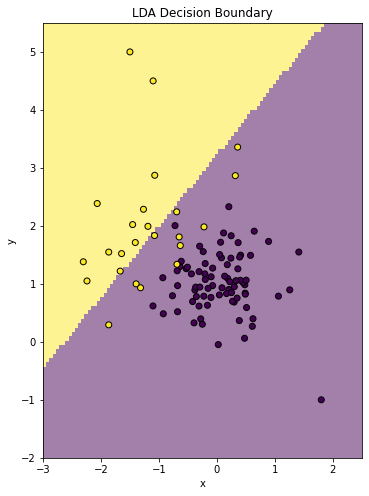

Logistic regression error rate (MSE) - Train: 0.893%
Logistic regression error rate (MSE) - Test: 0.865%


In [63]:
# Calculate weights, empirical means, and empirical covariance matrix
def LDA_param(X_data, labels):
    classes = np.unique(labels)
    weights = np.array([np.mean(labels == cls) for cls in classes])
    means = np.array([X_data[labels == cls].mean(axis=0) for cls in classes])  
    cov = sum([(X_data[labels == cls] - means[i]).T @ (X_data[labels == cls] - means[i]) / len(labels) for i, cls in enumerate(classes)])
    return weights, means, cov

weights_lda, means_lda, cov_lda = LDA_param(X_outliers[:,1:],t_outliers)
print(f"Parameters of LDA for the train set:\n\nWeights: {weights_lda}\nMeans: {means_lda}\nCovariance: {cov_lda}")
# LDA : single covariance matrix ie dim(1,1)

# LDA Classifier
def lda_predict(X_data, weights, means, cov):
    inv_cov = cov**(-1) # Because cov is a scalar
    scores = []
    for i, mean in enumerate(means):
        # To calculate every decision boundary function
        diff = X_data - mean # (X - mu) in our formula
        score = np.log(weights[i]) - 0.5 * np.sum(diff * inv_cov * diff, axis=1) - 0.5 * np.log(np.abs(cov)) # Because cov is a scalar
        scores.append(score)
    scores = np.vstack(scores).T
    predictions = np.argmax(scores, axis=1) + 1 
    return predictions
    
# Create mesh grid
Nx1, Nx2 = 100, 100
x1_vals = np.linspace(-3.0, 2.5, Nx1)
x2_vals = np.linspace(-2.0, 5.5, Nx2)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
grid_points = np.c_[X1.ravel(), X2.ravel()]

# Predict on grid for visualization
grid_preds_lda = lda_predict(grid_points, weights_lda, means_lda, cov_lda)
plt.imshow(grid_preds_lda.reshape(Nx1, Nx2), extent=(x1_vals.min(), x1_vals.max(), x2_vals.min(), x2_vals.max()), origin='lower', alpha=0.5)
plt.scatter(X_outliers[:, 1], X_outliers[:, 2], c=t_outliers, edgecolor='k', marker='o')
plt.gcf().set_size_inches((8, 8))   
plt.title("LDA Decision Boundary")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Calculate error rates
Labels_train_pred_lda = lda_predict(X_outliers[:,1:], weights_lda, means_lda, cov_lda)
Labels_test_pred_lda = lda_predict(X_test[:,1:], weights_lda, means_lda, cov_lda)
mse_train = mean_squared_error(t_outliers, Labels_train_pred_lda)
print(f"Logistic regression error rate (MSE) - Train: {mse_train:.3f}%")
mse_test = mean_squared_error(t_test, Labels_test_pred_lda)
print(f"Logistic regression error rate (MSE) - Test: {mse_test:.3f}%")

<div style="background-color: rgba(255, 255, 0, 0.15); padding: 8px;">
So we have a higher error rate for the LDA, which means logistic regression is our best model for now to predict classes. It is fast, with a low error rate and easy to implement, therefore we can now choose this one to have better predictions for classification problems.
</div>

## 2. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images 
of handwritten digits which are 5 and 6 here. Each line of the matrix
contains 256 pixel values coding for the gray level of a 16x16 image.

In [64]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

### Examples of images


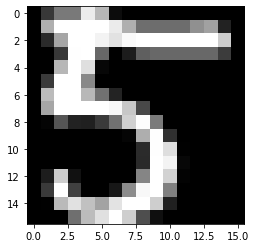

In [68]:
# Digit 5
n=9
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

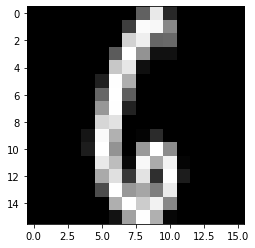

In [69]:
# Digit 6
n=5
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:


In [70]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

## Exercise 2: logistic regression to classify 5 & 6

1. Note that pixel values are between -1 and 1 by using the functions
 `min(I(:))` and `max(I(:))`.
2. Identify the indices of the most significant pixels, which are defined 
as having a standard deviation greater than 0.5 here. We denote by `lis_sig`
the list of positions of these significant pixels in the image vector.
_Indication : the function `std` gives the standard deviation (columnwise
in matrices) and you should find 173 pixel positions.
3. Show a binary image to locate these pixels.
_Indication : `Isig = zeros(16); Isig(list_sig)=1; Isig=Isig';`._
4. Define the training set `x_train` from `x_train_brut` from the significant pixels only.
5. Do the same with `x_test_brut` to extract `x_test`.
6. Use `regression_logistique.m` to estimate the logistic regression vector
`w` from the training set `x_train`. 
Choose `Nitermax = 13; eps_conv = 1e-3;`
7. Compute the decision function and the labels of the test set `x_test`. 
_Indication : do not forget the column of ones !_
8. Estimate the classification error rate by using :
`erreur = sum(abs(class-class_test))/N_test;`.
9. Locate some misclassified examples and visualize the corresponding image.
Comment on your results and observations.


In [ ]:
# Exercise 2

## 3. Logistic regression using `scikit-learn`

1. **Go to** http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for a presentation of the logistic regression model in `scikit-learn`.

2. **Apply** it to the present data set.

3. **Comment** on the use of logistic regression.

*Indication : you may have a look at* 

a) Theory : http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex5/ex5.html

b) Video :  https://kr.coursera.org/lecture/machine-learning/regularized-logistic-regression-cAxpF 

c) Example : http://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py

*for a short presentation of regularized logistic regression.*

In [ ]:
# Include your code here
from sklearn.linear_model import LogisticRegression
# ...


Commentaires :